## DỰ ĐOÁN GIÁ NHÀ
---
Tập dữ liệu bao gồm 545 bản ghi về các thông số của căn nhà và giá bán. Các thông số bao gồm:
1. area: diện tích căn nhà
2. bedrooms: số phòng ngủ (interger)
3. bathrooms: số phòng tắm
4. mainroad: Có gần đường chính hay không (Yes|No)
5. gestroom: Có phòng khách hay không (Yes | No)
6. basement: Có tầng hầm hay không (Yes | No)
7. parking: số chỗ đỗ xe oto
8. furnishingstatus: Tình trạng nội thất của căn nhà
    * unfurnished: không có nội thất
    * semi-furnished: được trang bị một phần nội thất
    * furnished: đầy đủ nội thất 
9. price: Giá bán ($)

## A. Chuẩn bị dữ liệu
---
### 1 Đọc và quan sát dữ liệu

In [1]:
#Gọi thư viện sử dụng
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#----------------------------
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Load dữ liệu từ datasets:
data = pd.read_excel('Data/Data_Housing.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   area              545 non-null    int64 
 1   bedrooms          545 non-null    int64 
 2   bathrooms         545 non-null    int64 
 3   mainroad          545 non-null    object
 4   guestroom         545 non-null    object
 5   basement          545 non-null    object
 6   parking           545 non-null    int64 
 7   furnishingstatus  545 non-null    object
 8   price             545 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 38.4+ KB


In [3]:
#Hiển thị 5 dòng dữ liệu đầu tiên:
data.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,parking,furnishingstatus,price
0,1650,3,1,no,no,yes,0,unfurnished,3150000
1,1700,3,1,yes,no,no,0,unfurnished,1890000
2,1836,2,1,no,no,yes,0,semi-furnished,2275000
3,1905,5,1,no,no,yes,0,semi-furnished,4340000
4,1950,3,2,yes,no,yes,0,unfurnished,3430000


In [4]:
#Hiển thị 5 dòng dữ liệu cuối cùng:
data.tail()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,parking,furnishingstatus,price
540,12944,3,1,yes,no,no,0,unfurnished,8500000
541,13200,3,1,yes,no,yes,2,furnished,10800000
542,13200,2,1,yes,no,yes,1,furnished,11930000
543,15600,3,1,yes,no,no,2,semi-furnished,10943000
544,16200,5,3,yes,no,no,0,unfurnished,11150000


In [5]:
#Kiểm tra dữ liệu missing:
data.isnull().sum()

area                0
bedrooms            0
bathrooms           0
mainroad            0
guestroom           0
basement            0
parking             0
furnishingstatus    0
price               0
dtype: int64

In [6]:
#Kiểm tra dữ liệu trùng lặp:
data.duplicated().sum()

0

In [7]:
#Các đặc trưng thống kê của các thuộc tính số:
data.describe()

,area,bedrooms,bathrooms,parking,price
count,545.000000,545.000000,545.000000,545.000000,5.450000e+02
mean,5150.541284,2.965138,1.286239,0.693578,4.944711e+06
std,2170.141023,0.738064,0.502470,0.861586,1.995583e+06
min,1650.000000,1.000000,1.000000,0.000000,1.750000e+06
25%,3600.000000,2.000000,1.000000,0.000000,3.493000e+06
50%,4600.000000,3.000000,1.000000,0.000000,4.473000e+06
75%,6360.000000,3.000000,2.000000,1.000000,6.083000e+06
max,16200.000000,6.000000,4.000000,3.000000,1.193000e+07


**NHẬN XÉT:**
* Diện tích các căn nhà trong khoảng từ 1650 (m2) đến 16200 (m2), trung bình là 5150 (m2)
* Số phòng của của các căn nhà nhỏ nhất là 1 phòng, nhiều nhất là 6 phòng ngủ, trung bình ~3 phòng ngủ mỗi căn nhà
* Số phòng tắm nhỏ nhất là 1 phòng, nhiều nhất là 4 phòng.
* Chỗ đỗ xe, thấp nhất là 0 có chỗ đỗ nào, nhiều nhất là 3 bãi đỗ xe.
* Giá bán trong khoảng từ 1.75 triệu USD đến 11.93 triệu USD, trung bình mỗi căn bán với giá 4.95 triệu USD

In [8]:
#Quan sát các đặc trưng thống kê của biến có kiểu Object:
data.describe(include='O')

,mainroad,guestroom,basement,furnishingstatus
count,545,545,545,545
unique,2,2,2,3
top,yes,no,no,semi-furnished
freq,468,448,354,227


In [9]:
#Thống kê tình trạng nội thất của các căn nhà:
data['furnishingstatus'].value_counts(normalize=True)

furnishingstatus
semi-furnished    0.416514
unfurnished       0.326606
furnished         0.256881
Name: proportion, dtype: float64

**NHẬN XÉT:**
* Các căn nhà chủ yếu là gần đường chính với 468/545 (~ 86%) căn - Yes
* Các căn nhà hầu hết là không có phòng khách với 448/545 (~82%) căn - No
* Đại đa số các căn nhà không có tầm hầm 354/545 (65%) căn - No
* Các căn nhà đã được trang bị đầy đủ nội thất (140/545 ~ 26%), trang bị một phần (227/545 ~ 42%), không có nội thất (178/545 ~ 33%)

In [10]:
data.sample(5)

,area,bedrooms,bathrooms,mainroad,guestroom,basement,parking,furnishingstatus,price
3,1905,5,1,no,no,yes,0,semi-furnished,4340000
286,4800,3,1,yes,yes,yes,0,unfurnished,5866000
244,4350,2,1,yes,no,yes,0,unfurnished,4865000
133,3540,2,1,no,yes,yes,0,semi-furnished,5040000
247,4360,4,1,yes,no,no,0,furnished,4270000


### 2. Chuẩn hóa dữ liệu
---
Các mô hình học máy chỉ làm việc trên dữ liệu dạng số, Biến đổi dữ liệu các thuộc tính Object về dạng số:
Có 4 thuộc tính có kiểu dữ liệu là Object:
1. mainroad: yes - no
2. guestroom: yes - no
3. basement: yes - no
4. furnishingstatus: unfurnished - semi-furnished - furnished

In [11]:
#Biển đổi các thuộc tính dữ liệu Object về dạng số:
#Tạo bản sao dữ liệu
data_ML = data.copy()

#Biếu đổi thuộc tính về dạng số:
# 1.Thuộc tính mainroad:
label = {'no':0,
         'yes':1}

data_ML['mainroad'] = data_ML['mainroad'].replace(label).astype(int)
data_ML['guestroom'] = data_ML['guestroom'].replace(label).astype(int)
data_ML['basement'] = data_ML['basement'].replace(label).astype(int)

label_status = {'unfurnished':1,
         'semi-furnished':2,
        'furnished':3}

data_ML['furnishingstatus'] = data_ML['furnishingstatus'].replace(label_status).astype(int)
#Kết quả sau biến đổi:
data_ML

,area,bedrooms,bathrooms,mainroad,guestroom,basement,parking,furnishingstatus,price
0,1650,3,1,0,0,1,0,1,3150000
1,1700,3,1,1,0,0,0,1,1890000
2,1836,2,1,0,0,1,0,2,2275000
3,1905,5,1,0,0,1,0,2,4340000
4,1950,3,2,1,0,1,0,1,3430000
...,...,...,...,...,...,...,...,...,...
540,12944,3,1,1,0,0,0,1,8500000
541,13200,3,1,1,0,1,2,3,10800000
542,13200,2,1,1,0,1,1,3,11930000
543,15600,3,1,1,0,0,2,2,10943000


In [12]:
#Lưu dữ liệu đã xử lý ra file:
data_ML.to_csv('Data/Data_Housing_OK.csv',index=None)

## B. Dự đoán giá nhà với mô hình hồi quy tuyến tính
---

### 1. Phân tách biến độc lập và phụ thuộc

In [14]:
#Sử dụng 8 tham số để dự đoán giá nhà
#Biến độc lập
X_house = data_ML[['area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom', 'basement','parking', 'furnishingstatus']]

#Biến phụ thuộc y
y_price = data_ML[['price']]

X_house.head()

,area,bedrooms,bathrooms,mainroad,guestroom,basement,parking,furnishingstatus
0,1650,3,1,0,0,1,0,1
1,1700,3,1,1,0,0,0,1
2,1836,2,1,0,0,1,0,2
3,1905,5,1,0,0,1,0,2
4,1950,3,2,1,0,1,0,1


In [15]:
y_price.head()

,price
0,3150000
1,1890000
2,2275000
3,4340000
4,3430000


### 2. Phân tách dữ liệu thành tập train-test và huấn luyện mô hình

In [16]:
#Phân tách tập train - test
from sklearn.model_selection import train_test_split
X_house_train, X_house_test, y_train, y_test = train_test_split(X_house,
                                                                y_price,
                                                               train_size=0.85,
                                                               shuffle=True,
                                                               random_state=42)
print('Kích thước tập Train:', len(X_house_train))
print('Kích thước tập Test:', len(X_house_test))

Kích thước tập Train: 463
Kích thước tập Test: 82


In [18]:
#Khai báo mô hình hồi quy tuyến tính:
from sklearn.linear_model import LinearRegression
model_all = LinearRegression()

In [19]:
#Huấn luyện mô hình
model_all.fit(X_house_train, y_train)

LinearRegression()

In [20]:
model_all.coef_

array([[5.44594483e+02, 2.55889691e+05, 9.36928127e+05, 5.05463805e+05,
        4.06549231e+05, 2.77709928e+05, 2.11105308e+05, 2.66654525e+05]])

In [21]:
#Hệ số w0
model_all.intercept_

array([-1090303.86680011])

In [22]:
#Đánh giá độ chính xác trên tập kiểm thử
y_pred_all = model_all.predict(X_house_test).astype(int).ravel()
print('Giá dự đoán:', y_pred_all)

Giá dự đoán: [ 4484957  3821823  4892314  2865055  5514507  4064333  3199981  4727382
  8436099  6624083  2486365  5752842  6621233  6587838  7250280  7349553
  7712698  4242659  6816394  6837831  3113555  3130053 10118896  3974058
  5464166  2169298  5985628  5402941  4025094  6697447  3497578  6740593
  2596420  6938927  6147360  4343399  3808443  5917663  5381641  9005843
  3902335  5482738  5256380  4520309  6765300  3837086  4765835  3357716
  4924017  8435642  2807201  8631543  5420969  5942250  7368247 10570950
  2765672  8164486  5306234  6736165  5588484  5225572  5251201  5814660
  3461039  3157122  3124447  3510330  4550042  3912903  6475215  3107399
  5061104  4844348  7406242  3113391  3374251  4978758  3052870  8775231
  2258841  4376038]


In [26]:
#Chuyển đổi dữ liệu dự đoán
y_test = y_test.values.ravel()

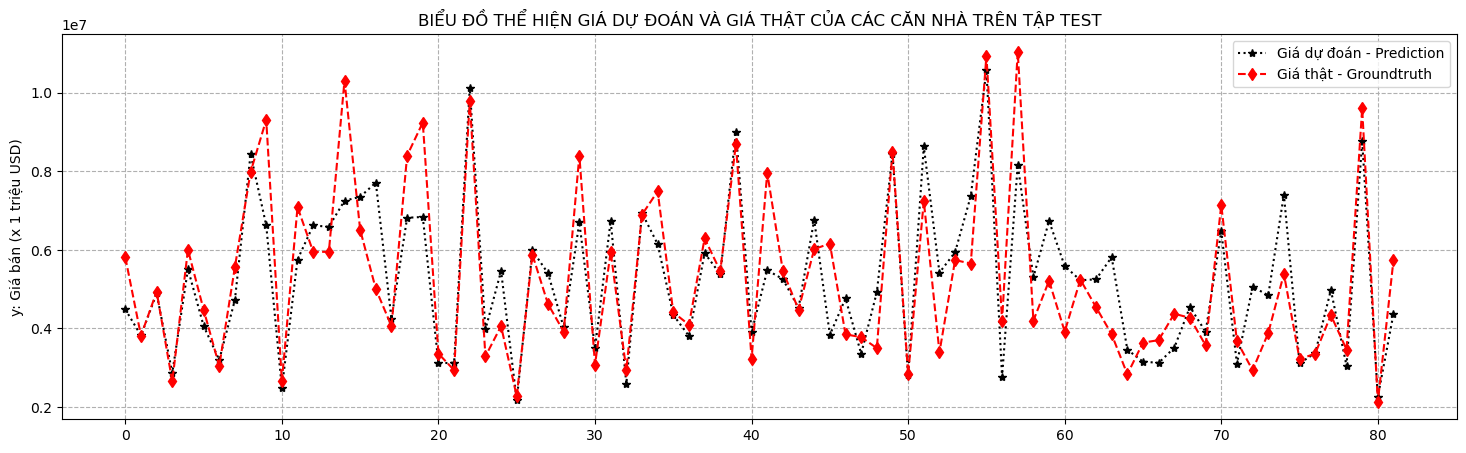

In [27]:
#Trực quan hóa kết quả
plt.figure(figsize=(18,5))
plt.plot(y_pred_all, marker='*',color ='black', linestyle=':', label='Giá dự đoán - Prediction')
plt.plot(y_test, marker='d', color='red', linestyle='--', label='Giá thật - Groundtruth')
plt.title('BIỂU ĐỒ THỂ HIỆN GIÁ DỰ ĐOÁN VÀ GIÁ THẬT CỦA CÁC CĂN NHÀ TRÊN TẬP TEST')
plt.ylabel("y: Giá bán (x 1 triệu USD)")
plt.grid(ls='--')
plt.legend()
plt.show()

In [28]:
# Đánh giá độ chính xác trên tập TEST:
from sklearn.metrics import mean_absolute_error, mean_squared_error
#Tính các sai số:
mae_test1 = mean_absolute_error(y_test, y_pred_all)
mse_test1 = mean_squared_error(y_test, y_pred_all)
rmse_test1 = (np.sqrt(mse_test1))

print("Độ chính xác của mô hình thay đổi trên tập Kiểm thử:")
print("--------------------------------------------")
print('1.Sai số MAE  = ',round(mae_test1,0))
print('2.Sai số MSE  = ',round(mse_test1,0))
print('3.Sai số RMSE = ',round(rmse_test1,0))

Độ chính xác của mô hình thay đổi trên tập Kiểm thử:
--------------------------------------------
1.Sai số MAE  =  844278.0
2.Sai số MSE  =  1329889581902.0
3.Sai số RMSE =  1153208.0


In [29]:
#Sử dụng mô hình : 'area', 'bedrooms', 'bathrooms', 'mainroad', 'guestroom', 'basement', 'parking', 'furnishingstatus'
#Giá sử dụng khu nhà có thông số như sau:
area = 5500
bed = 3
bath = 2
main = 0 #No
gest = 0 #No
base = 1 #Yes
park = 1
fur = 1 #unfurnished - kh có nội thất

#--> bán với giá bao nhiêu?
house1 = np.array([[area, bed, bath, main, gest, base, park, fur]])
print('Thông số của căn hộ 2121051035: ',house1)

house1_price = model_all.predict(house1).astype(int)
print('Giá bán dự đoán:', house1_price)

Thông số của căn hộ 2121051035:  [[5500    3    2    0    0    1    1    1]]
Giá bán dự đoán: [[5301960]]
